<img src="https://nserc-hi-am.ca/2020/wp-content/uploads/sites/18/2019/12/McGill.png" width="500" height="400" align="left">

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>


# INSY 695: Final Group Project
#### Arnaud Guzman-Annès | ID: 260882529
#### Jules Zielinski Babu | ID: 
#### Ram Babu | ID: 260958970
#### Dorothy Zou | ID: 260950477
#### Rameez Rosul | ID: 
#### Johnny Qiao | ID: 

<br>
<br>

**Date: April 1st, 2021**
<br>
<br>

In [31]:
## Initial setup

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
pd.options.mode.chained_assignment = None  # default='warn'

#display all columns
pd.set_option('display.max_columns', None)

In [2]:
# Sets seed for the entire notebook

np.random.seed(42)

In [3]:
# Import data
df = pd.read_csv("bankruptcy.csv")
bankruptcy = df.copy() # we can use this as raw data afterwards

In [4]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [7]:
# Some more information about the dataset

display(df.shape)
display(df.isnull().sum())
display(df.describe())

(6819, 96)

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

In [5]:
# Cheking for unique values

display(df[' Liability-Assets Flag'].nunique())
display(df[' Net Income Flag'].nunique())

2

1

In [5]:
# Dropping these 2 columnds

# Liability-Assets Flag
# Net Income Flag

df[[' Liability-Assets Flag']].value_counts() 
df[' Liability-Assets Flag'].corr(df['Bankrupt?'])

#df = df.drop([' Liability-Assets Flag'], axis=1)
df = df.drop([' Net Income Flag'], axis=1)

Text(0, 0.5, 'Number of companies')

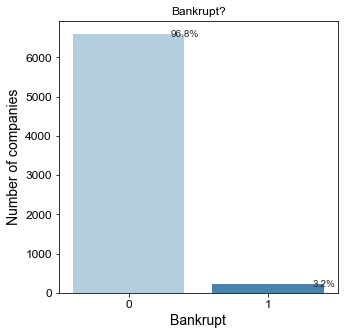

In [7]:
# We are checking for imbalanced data
# Print figure

import seaborn as sns

plt.figure(figsize=(5,5))
splot = sns.countplot(data = df,x = 'Bankrupt?',palette = 'Blues')
sns.set_style('ticks')
total = float(len(df))
for p in splot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    splot.annotate(percentage, (x,y), ha = 'center', va = 'center')
plt.title("Bankrupt?")
plt.xlabel("Bankrupt")
plt.ylabel("Number of companies")

In [11]:
# We are going to work later on on this issue.

<AxesSubplot:>

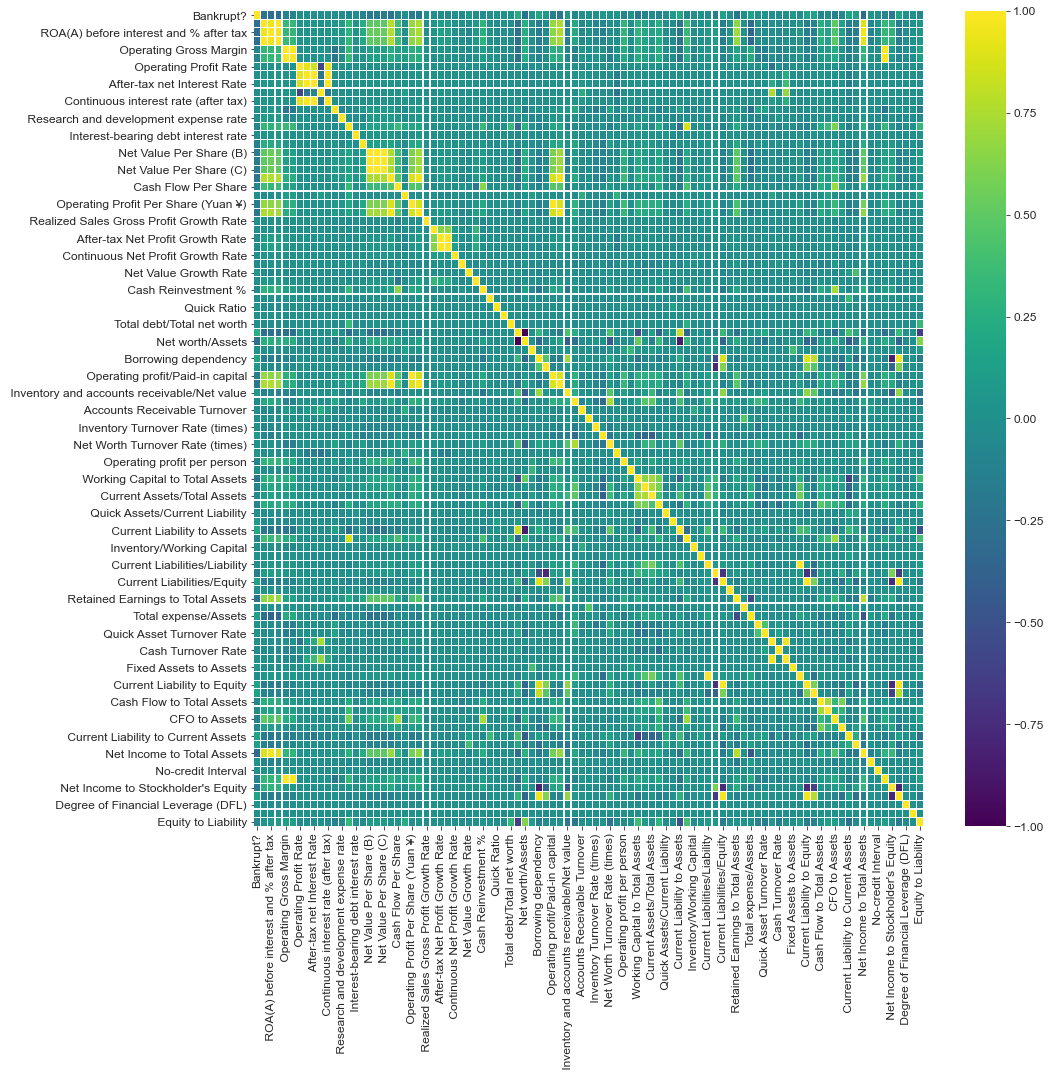

In [8]:
# Correlation

corr = df.corr()
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, ax = ax, cmap = 'viridis', linewidth = 0.1)

In [11]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i, j]) >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    return(dataset)


In [13]:
correlation(df, 0.65)

,Bankrupt?,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Cash Flow Per Share,Revenue Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Long-term Liability to Current Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Cash Flow to Total Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.601457,0.998969,0.302646,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.311664,0.017560,0.022102,0.848195,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.002259,0.001208,0.629951,0.021266,0.207576,0.005024,0.390284,0.006479,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.034164,0.392913,0.037135,0.672775,0.166673,0.004094,0.001997,1.473360e-04,0.276920,0.001036,0.676269,2.559237e-02,0.002022,0.064856,7.010000e+08,6.550000e+09,4.580000e+08,0.424206,0.637555,0.312905,0.118250,0,0.009219,0.622879,0.026601,0.564050,0.016469
1,1,0.464291,0.610235,0.998946,0.303556,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.318137,0.021144,0.022080,0.848088,0.689693,0.217620,6.110000e+09,0.000443,0.264516,0.006016,0.004039,0.635172,0.012502,0.171176,0.005059,0.376760,0.005835,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.006889,0.391590,0.012335,0.751111,0.127236,0.014948,0.004136,1.383910e-03,0.289642,0.005210,0.308589,2.394682e-02,0.002226,0.025516,1.065198e-04,7.700000e+09,2.490000e+09,0.468828,0.641100,0.314163,0.047775,0,0.008323,0.623652,0.264577,0.570175,0.020794
2,1,0.426071,0.601450,0.998857,0.302035,2.361297e-04,2.550000e+07,0.458521,7.900790e-04,0.000000,0.177911,0.307102,0.005944,0.022760,0.848094,0.689463,0.217601,7.280000e+09,0.000396,0.264184,0.011543,0.005348,0.629631,0.021248,0.207516,0.005100,0.379093,0.006562,0.014993,0.001495,0.004227,6.500000e+07,2.650000e+09,0.028997,0.381968,0.141016,0.829502,0.340201,0.000991,0.006302,5.340000e+09,0.277456,0.013879,0.446027,3.715116e-03,0.002060,0.021387,1.791094e-03,1.022676e-03,7.610000e+08,0.276179,0.642765,0.314515,0.025346,0,0.040003,0.623841,0.026555,0.563706,0.016474
3,1,0.399844,0.583541,0.998700,0.303350,1.078888e-04,0.000000e+00,0.465705,4.490449e-04,0.000000,0.154187,0.321674,0.014368,0.022046,0.848005,0.689110,0.217568,4.880000e+09,0.000382,0.263371,0.004194,0.002896,0.630228,0.009572,0.151465,0.005047,0.379743,0.005366,0.089955,0.001966,0.003215,7.130000e+09,9.150000e+09,0.015463,0.378497,0.021320,0.725754,0.161575,0.018851,0.002961,1.010646e-03,0.276580,0.003540,0.615848,2.216520e-02,0.001831,0.024161,8.140000e+09,6.050000e+09,2.030000e+09,0.559144,0.579039,0.302382,0.067250,0,0.003252,0.622929,0.026697,0.564663,0.023982
4,1,0.465022,0.598783,0.998973,0.303475,7.890000e+09,0.000000e+00,0.462746,6.860686e-04,0.000000,0

In [40]:
filtered_col = correlation(df, 0.65).columns
df = df[filtered_col]
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Cash Flow Per Share,Revenue Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Long-term Liability to Current Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Cash Flow to Total Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.601457,0.998969,0.302646,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.311664,0.017560,0.022102,0.848195,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.002259,0.001208,0.629951,0.021266,0.207576,0.005024,0.390284,0.006479,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.034164,0.392913,0.037135,0.672775,0.166673,0.004094,0.001997,1.473360e-04,0.276920,0.001036,0.676269,2.559237e-02,0.002022,0.064856,7.010000e+08,6.550000e+09,4.580000e+08,0.424206,0.637555,0.312905,0.118250,0,0.009219,0.622879,0.026601,0.564050,0.016469
1,1,0.464291,0.610235,0.998946,0.303556,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.318137,0.021144,0.022080,0.848088,0.689693,0.217620,6.110000e+09,0.000443,0.264516,0.006016,0.004039,0.635172,0.012502,0.171176,0.005059,0.376760,0.005835,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.006889,0.391590,0.012335,0.751111,0.127236,0.014948,0.004136,1.383910e-03,0.289642,0.005210,0.308589,2.394682e-02,0.002226,0.025516,1.065198e-04,7.700000e+09,2.490000e+09,0.468828,0.641100,0.314163,0.047775,0,0.008323,0.623652,0.264577,0.570175,0.020794
2,1,0.426071,0.601450,0.998857,0.302035,2.361297e-04,2.550000e+07,0.458521,7.900790e-04,0.000000,0.177911,0.307102,0.005944,0.022760,0.848094,0.689463,0.217601,7.280000e+09,0.000396,0.264184,0.011543,0.005348,0.629631,0.021248,0.207516,0.005100,0.379093,0.006562,0.014993,0.001495,0.004227,6.500000e+07,2.650000e+09,0.028997,0.381968,0.141016,0.829502,0.340201,0.000991,0.006302,5.340000e+09,0.277456,0.013879,0.446027,3.715116e-03,0.002060,0.021387,1.791094e-03,1.022676e-03,7.610000e+08,0.276179,0.642765,0.314515,0.025346,0,0.040003,0.623841,0.026555,0.563706,0.016474
3,1,0.399844,0.583541,0.998700,0.303350,1.078888e-04,0.000000e+00,0.465705,4.490449e-04,0.000000,0.154187,0.321674,0.014368,0.022046,0.848005,0.689110,0.217568,4.880000e+09,0.000382,0.263371,0.004194,0.002896,0.630228,0.009572,0.151465,0.005047,0.379743,0.005366,0.089955,0.001966,0.003215,7.130000e+09,9.150000e+09,0.015463,0.378497,0.021320,0.725754,0.161575,0.018851,0.002961,1.010646e-03,0.276580,0.003540,0.615848,2.216520e-02,0.001831,0.024161,8.140000e+09,6.050000e+09,2.030000e+09,0.559144,0.579039,0.302382,0.067250,0,0.003252,0.622929,0.026697,0.564663,0.023982
4,1,0.465022,0.598783,0.998973,0.303475,7.890000e+09,0.000000e+00,0.462746,6.860686e-04,0.000000,0

<AxesSubplot:>

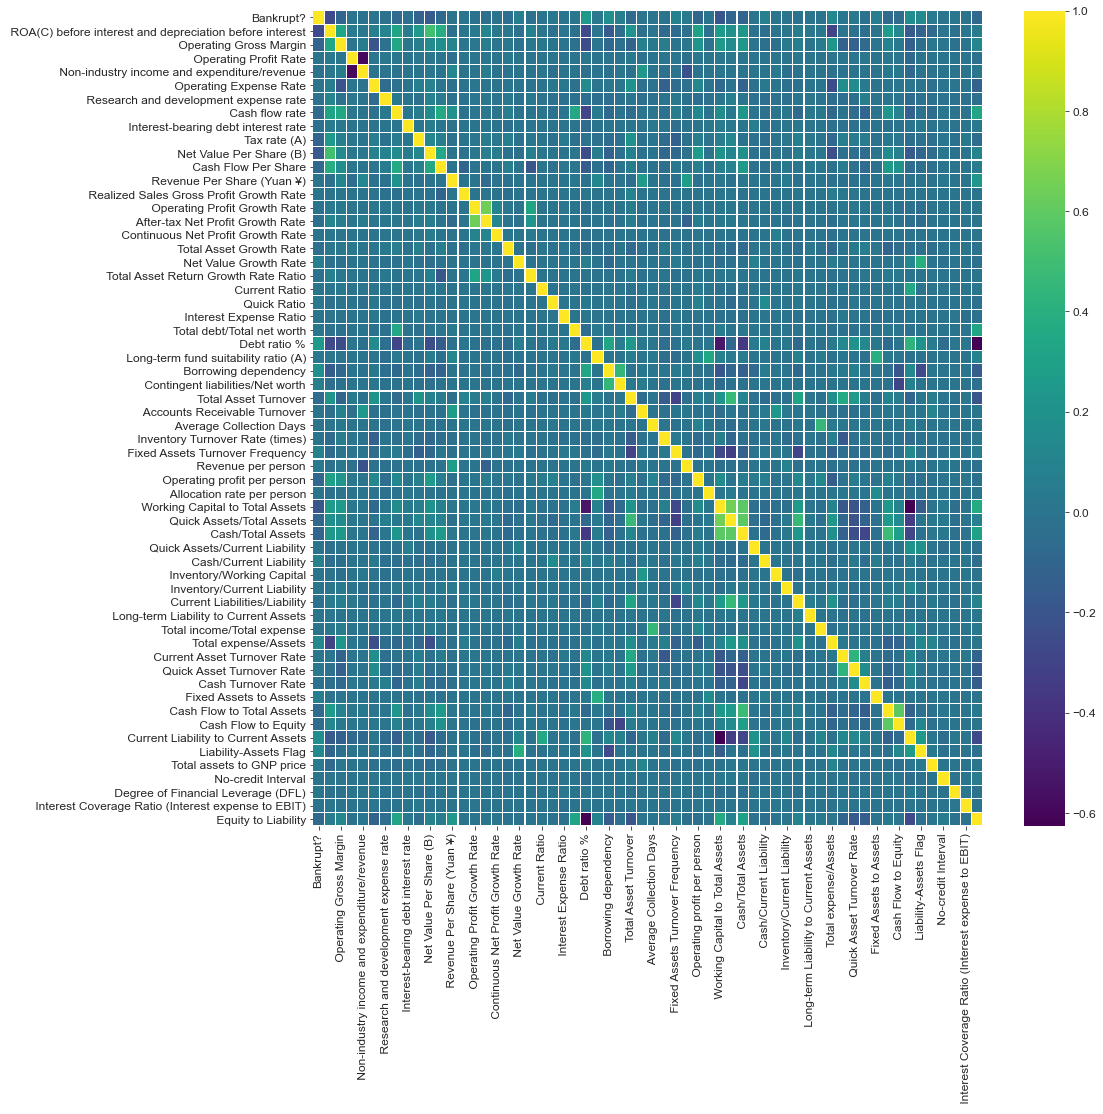

In [69]:
corr = df.corr()
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, ax = ax, cmap = 'viridis', linewidth = 0.1)

In [41]:
# Variable creation
X = df.drop(['Bankrupt?'], axis=1)
y = df['Bankrupt?']

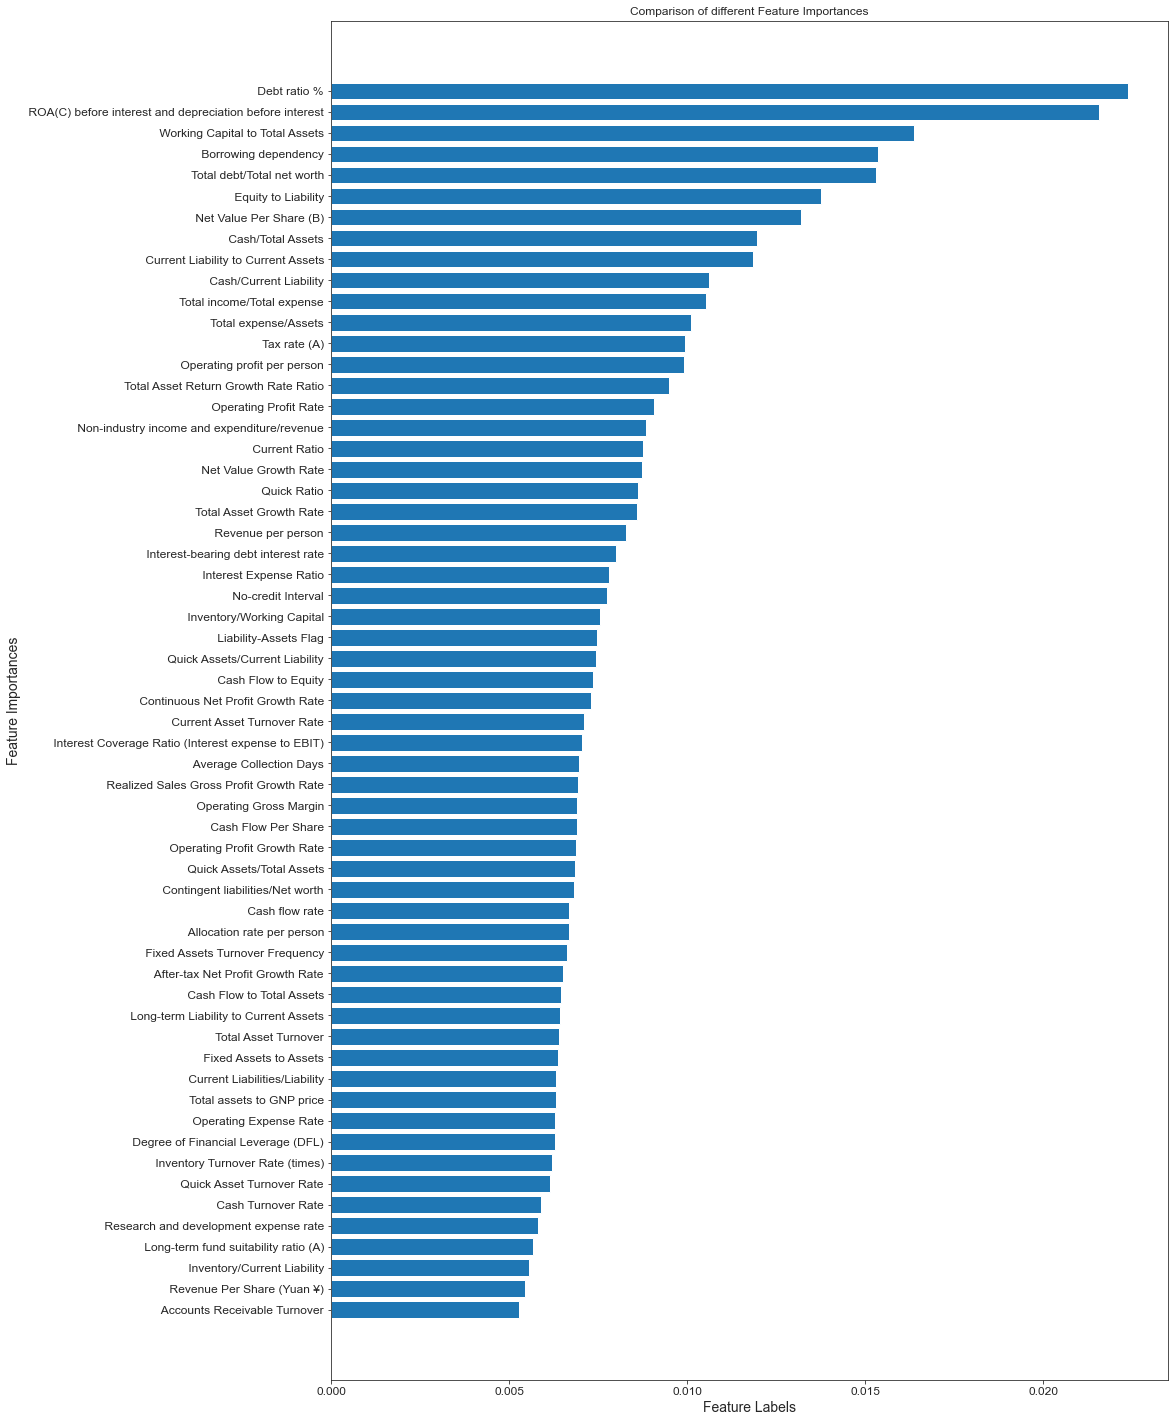

In [42]:
# feature selection (tree-based)

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

clf = ExtraTreesClassifier(n_estimators=50, random_state=45)
clf = clf.fit(X, y)
feature_importance = clf.feature_importances_
  
# Normalizing the individual importances 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        clf.estimators_], 
                                        axis = 0) 

tbfs = pd.DataFrame(
    {"X": X.columns, "FI": feature_importance_normalized}
)

tbfs = tbfs.sort_values('FI',ascending=True)


# Plotting a Bar Graph to compare the models 
plt.figure(figsize=(15,25))
plt.barh(y=tbfs['X'],width=tbfs['FI']) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show()


In [43]:
new_col = tbfs['X'][-10:]
X = X[new_col]
X

,Cash/Current Liability,Current Liability to Current Assets,Cash/Total Assets,Net Value Per Share (B),Equity to Liability,Total debt/Total net worth,Borrowing dependency,Working Capital to Total Assets,ROA(C) before interest and depreciation before interest,Debt ratio %
0,1.473360e-04,0.118250,0.004094,0.147950,0.016469,0.021266,0.390284,0.672775,0.370594,0.207576
1,1.383910e-03,0.047775,0.014948,0.182251,0.020794,0.012502,0.376760,0.751111,0.464291,0.171176
2,5.340000e+09,0.025346,0.000991,0.177911,0.016474,0.021248,0.379093,0.829502,0.426071,0.207516
3,1.010646e-03,0.067250,0.018851,0.154187,0.023982,0.009572,0.379743,0.725754,0.399844,0.151465
4,6.804636e-04,0.047725,0.014161,0.167502,0.035490,0.005150,0.375025,0.751822,0.465022,0.106509
...,...,...,...,...,...,...,...,...,...,...
6814,5.071548e-03,0.027951,0.099481,0.175045,0.029890,0.006655,0.373823,0.817769,0.493687,0.124618
6815,4.727181e-03,0.031470,0.080337,0.181324,0.038284,0.004623,0.372505,0.793387,0.475162,0.099253
6816,8.821248e-02,0.007542,0.412885,0.269521,0.097649,0.001392,0.369637,0.866047,0.472725,0.038939
6817,7.133218e-03,0.022916,0.112238,0.213392,0.044009,0.003816,0.369649,0.832340,0.506264,0.086979


In [44]:
display(X.shape)
display(y.shape)

(6819, 10)

(6819,)

In [45]:
#Scaling
from sklearn.preprocessing import StandardScaler
x_col = X.columns
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
X = pd.DataFrame(x_scaled)
X.columns = x_col
#X.apply(pd.to_numeric)
display(X.head())

,Cash/Current Liability,Current Liability to Current Assets,Cash/Total Assets,Net Value Per Share (B),Equity to Liability,Total debt/Total net worth,Borrowing dependency,Working Capital to Total Assets,ROA(C) before interest and depreciation before interest,Debt ratio %
0,-0.072818,2.812493,-0.861820,-1.279247,-0.622067,-0.026226,0.959784,-2.393729,-2.217909,1.750845
1,-0.072818,0.527485,-0.783873,-0.251878,-0.535573,-0.026226,0.129305,-1.067133,-0.673828,1.075727
2,10.391338,-0.199721,-0.884109,-0.381876,-0.621960,-0.026226,0.272560,0.260402,-1.303672,1.749724
3,-0.072818,1.158899,-0.755844,-1.092453,-0.471826,-0.026226,0.312459,-1.496543,-1.735886,0.710131
4,-0.072818,0.525867,-0.789524,-0.693621,-0.241715,-0.026226,0.022791,-1.055083,-0.661778,-0.123674


In [46]:
#Anomaly Detection
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(n_estimators=100,contamination=0.01)
pred = iforest.fit_predict(X)
score = iforest.decision_function(X)
from numpy import where
anom_index = where(pred==-1)
values = X.iloc[anom_index]

for i in values.index:
    X = X.drop(i)
    y = y.drop(i)

In [47]:
display(X.shape)
display(y.shape)

(6750, 10)

(6750,)

In [48]:
# Splitting the data set to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [49]:
# Dealing with imbalanced data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTE(sampling_strategy = 0.2)
under = RandomUnderSampler(sampling_strategy = 0.6)

steps = [('o',over),('u',under)]
pipeline = Pipeline(steps = steps)

X_train, y_train = pipeline.fit_resample(X_train, y_train)

In [50]:
display(y_train.shape)
display(X_train.shape)

(2448,)

(2448, 10)

In [51]:
count = 0
for i in y_train:
    if i == 1:
        count +=1
print("There are",count,"cases of bankruptcy and",len(y_train)-count,"of non-bankruptcy")

There are 918 cases of bankruptcy and 1530 of non-bankruptcy


In [52]:
y_train = pd.DataFrame(y_train) 

Text(0, 0.5, 'Number of companies')

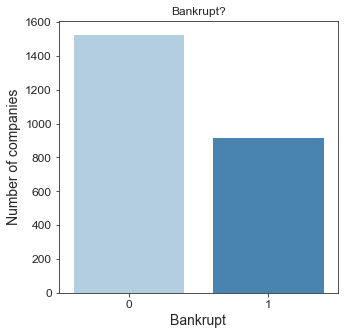

In [53]:
plt.figure(figsize=(5,5))
splot = sns.countplot(data = y_train, x = 'Bankrupt?', palette = 'Blues')
sns.set_style('ticks')
total = float(len(df))
plt.title("Bankrupt?")
plt.xlabel("Bankrupt")
plt.ylabel("Number of companies")

In [39]:
"""# Modelling with balanced target 

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

model = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
model.fit(X_train, y_train)

sel = SelectFromModel(model)
sel.fit(X_train, y_train)

selected_feat= X_train.columns[(sel.get_support())]"""

'# Modelling with balanced target \n\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.feature_selection import SelectFromModel\n\nmodel = RandomForestClassifier(n_estimators=1000, n_jobs=-1)\nmodel.fit(X_train, y_train)\n\nsel = SelectFromModel(model)\nsel.fit(X_train, y_train)\n\nselected_feat= X_train.columns[(sel.get_support())]'

In [40]:
#X_train = selected_feat

### Base Model

In [54]:
# Find some classification models and check their baseline accuracy with 10 CV folds

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score


def get_model():
    models = []
    models.append(('LR' , LogisticRegression()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('SVM', SVC()))
    models.append(('GBC', GradientBoostingClassifier()))
    models.append(('RF' , RandomForestClassifier(n_estimators=100)))
    models.append(('MLP', MLPClassifier()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    return models

def bl_performance(X_train, y_train,models):
    results = []
    names = []
    acc = []
    f1 = []
    for name, model in models:
        kfold = KFold(n_splits=10)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy') 
        cv_f1 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')
        results.append(cv_results)
        names.append(name)
        print('{}: CV accuracy mean: {:.4}'.format(name, cv_results.mean()))
        print('{}: CV F1 score mean: {:.4}'.format(name, cv_f1.mean()))
        acc += [cv_results.mean()]
        f1 += [cv_f1.mean()]
        
    result_df = pd.DataFrame()
    result_df['Model'] = ['LR','KNN','SVM','GBC','RF','MLP','LDA']
    result_df['Accuracy'] = acc
    result_df['F1'] = f1
        
    return names, results, result_df

In [55]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

models = get_model()
names,results, result_df= bl_performance(X_train, y_train,models)

C:\Users\Dorothy Zou\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Dorothy Zou\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Dorothy Zou\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Dorothy Zou\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

LR: CV accuracy mean: 0.8337
LR: CV F1 score mean: 0.3451


C:\Users\Dorothy Zou\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Dorothy Zou\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Dorothy Zou\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Dorothy Zou\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

KNN: CV accuracy mean: 0.9106
KNN: CV F1 score mean: 0.3934


C:\Users\Dorothy Zou\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Dorothy Zou\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Dorothy Zou\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Dorothy Zou\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

SVM: CV accuracy mean: 0.8615
SVM: CV F1 score mean: 0.3602


C:\Users\Dorothy Zou\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Dorothy Zou\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Dorothy Zou\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Dorothy Zou\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

GBC: CV accuracy mean: 0.8885
GBC: CV F1 score mean: 0.3718


C:\Users\Dorothy Zou\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dorothy Zou\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dorothy Zou\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dorothy Zou\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarni

RF: CV accuracy mean: 0.9285
RF: CV F1 score mean: 0.3849


C:\Users\Dorothy Zou\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Dorothy Zou\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Dorothy Zou\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Dorothy Zou\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

MLP: CV accuracy mean: 0.8533
MLP: CV F1 score mean: 0.3643
LDA: CV accuracy mean: 0.8083

C:\Users\Dorothy Zou\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Dorothy Zou\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Dorothy Zou\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Dorothy Zou\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples


LDA: CV F1 score mean: 0.3297


In [56]:
result_df

,Model,Accuracy,F1
0,LR,0.833672,0.345113
1,KNN,0.910580,0.393416
2,SVM,0.861482,0.360160
3,GBC,0.888458,0.371783
4,RF,0.928501,0.384932
5,MLP,0.853289,0.364299
6,LDA,0.808326,0.329692


## MLflow

In [61]:
import numpy as np
from sklearn.linear_model import LogisticRegression

import mlflow
import mlflow.sklearn

if __name__ == "__main__":
    
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    score = lr.score(X_test, y_test)
    print("Score: %s" % score)
    mlflow.log_metric("score", score)
    mlflow.sklearn.log_model(lr, "model")
    print("Model saved in run %s" % mlflow.active_run().info.run_uuid)

Score: 0.894320987654321
Model saved in run 9696855f75ba4db4b07aaffd0bc13443


### Keras Neural Network Model

In [68]:
import tensorflow as tf
from tensorflow import keras
from keras import backend as K

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[10]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(2, activation="softmax"))

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
               metrics=['acc',f1_m])

history = model.fit(X_train, y_train, epochs=8,  # epoch=30
                    validation_data=(X_test, y_test))

Epoch 1/8
77/77 [==============================] - 0s 5ms/step - loss: 0.5870 - acc: 0.7712 - f1_m: 0.5376 - val_loss: 0.5199 - val_acc: 0.8040 - val_f1_m: 0.0621
Epoch 2/8
77/77 [==============================] - 0s 3ms/step - loss: 0.4587 - acc: 0.8395 - f1_m: 0.5405 - val_loss: 0.4193 - val_acc: 0.8449 - val_f1_m: 0.0621
Epoch 3/8
77/77 [==============================] - 0s 4ms/step - loss: 0.3989 - acc: 0.8521 - f1_m: 0.5384 - val_loss: 0.3703 - val_acc: 0.8578 - val_f1_m: 0.0621
Epoch 4/8
77/77 [==============================] - 0s 6ms/step - loss: 0.3673 - acc: 0.8574 - f1_m: 0.5391 - val_loss: 0.3311 - val_acc: 0.8751 - val_f1_m: 0.0621
Epoch 5/8
77/77 [==============================] - 0s 4ms/step - loss: 0.3491 - acc: 0.8587 - f1_m: 0.5395 - val_loss: 0.3135 - val_acc: 0.8780 - val_f1_m: 0.0621
Epoch 6/8
77/77 [==============================] - 0s 3ms/step - loss: 0.3374 - acc: 0.8619 - f1_m: 0.5404 - val_loss: 0.2944 - val_acc: 0.8854 - val_f1_m: 0.0621
Epoch 7/8
77/77 [=====